# Importando Pandas e carregando dados

In [43]:
import pandas as pd

In [44]:
data = pd.read_csv("data_clustered.csv")

In [45]:
data

Id    X    Y     Cu      Ni  hier_labels  kmeans_labels
0      1   11    8  0.000  0.0000            0              1
1      2    8   30  0.000  0.0000            0              1
2      3    9   48  2.244  0.0545            0              1
3      4    8   68  4.344  0.1355            0              1
4      5    9   90  4.121  0.1095            0              1
..   ...  ...  ...    ...     ...          ...            ...
465  466  214   19  2.425  0.0780            0              1
466  467  245  231  1.612  0.1305            0              1
467  468  233  220  6.260  4.7985            0              0
468  469  226  221  8.001  8.4075            1              0
469  470  213  218  4.826  2.3810            0              1

[470 rows x 7 columns]

In [46]:
data.shape

(470, 7)

# ML supervisionado

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

In [48]:
#definindo variáveis de input
x_variables = ['Cu', 'Ni']

#transformando variáveis
df_std = (data[x_variables]-data[x_variables].mean())/data[x_variables].std()
df_std.describe()

Cu            Ni
count  4.700000e+02  4.700000e+02
mean   5.032027e-16  2.379302e-16
std    1.000000e+00  1.000000e+00
min   -1.454017e+00 -6.845942e-01
25%   -8.390387e-01 -6.458843e-01
50%   -3.733449e-02 -4.089947e-01
75%    6.926610e-01  1.962499e-01
max    3.636713e+00  7.005669e+00

In [49]:
#visualizando dataframe
df_std

Cu        Ni
0   -1.454017 -0.684594
1   -1.454017 -0.684594
2   -0.706448 -0.668443
3   -0.006852 -0.644440
4   -0.081143 -0.652145
..        ...       ...
465 -0.646150 -0.661479
466 -0.916994 -0.645921
467  0.631446  0.737410
468  1.211445  1.806914
469  0.153722  0.021000

[470 rows x 2 columns]

In [50]:
#levando classes (definidas com o kmeans) para o dataframe que contém os dados transformados
df_std['kmeans_labels'] = data['kmeans_labels']

In [51]:
#visualizando dataframe atualizado
df_std

Cu        Ni  kmeans_labels
0   -1.454017 -0.684594              1
1   -1.454017 -0.684594              1
2   -0.706448 -0.668443              1
3   -0.006852 -0.644440              1
4   -0.081143 -0.652145              1
..        ...       ...            ...
465 -0.646150 -0.661479              1
466 -0.916994 -0.645921              1
467  0.631446  0.737410              0
468  1.211445  1.806914              0
469  0.153722  0.021000              1

[470 rows x 3 columns]

In [52]:
#definindo variáveis de input
x_variables = ['Cu', 'Ni']

#definindo variáveis de output
y_variable = ['kmeans_labels']

In [61]:
#definindo subsets de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    df_std[x_variables], 
    df_std[y_variable], 
    test_size=0.2,
    shuffle=True, 
    stratify=df_std['kmeans_labels'],
    )

In [62]:
#instanciando preditor com a classe RandomForestClassifier
clf = RandomForestClassifier()

In [63]:
#ajustando o modelo com os dados de treino
clf.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [64]:
#usando o modelo para carimbar os dados de teste
Y_predicted = clf.predict(X_test)

In [65]:
#obtendo (e arredondando) o valor da acurácia
ac_score = round(accuracy_score(y_test, Y_predicted),3)

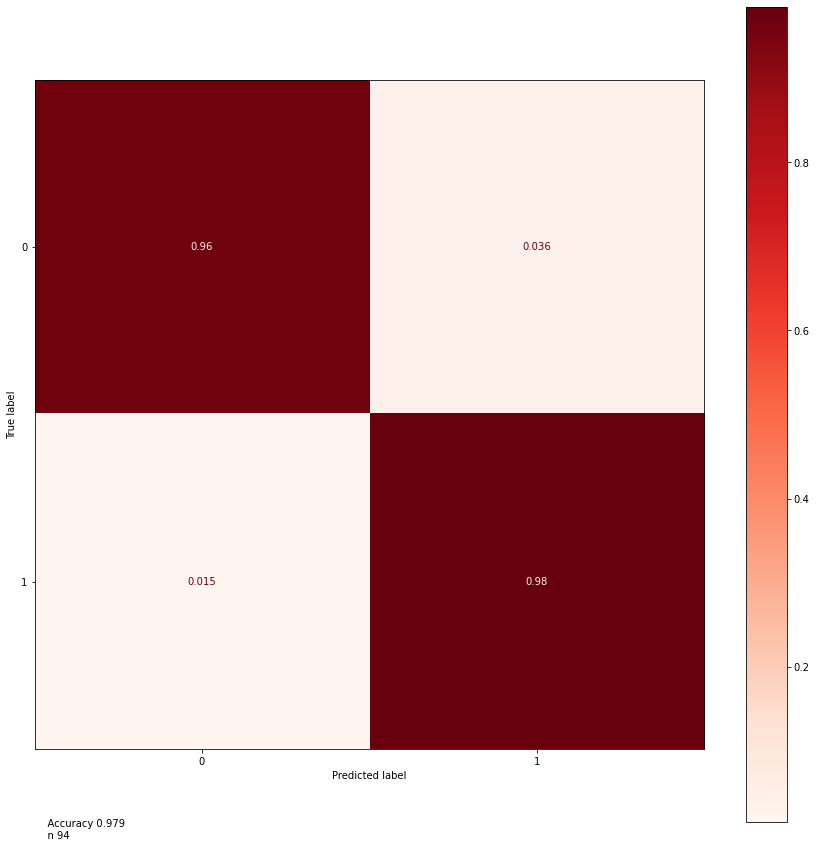

In [66]:
#plotando a matriz de confusão
fig, ax = plt.subplots(figsize=(15,15))
cm = confusion_matrix(y_test, Y_predicted, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot(cmap='Reds',ax=ax)
an_str = '''
    Accuracy {}
    n {}
    '''.format(ac_score, y_test.size)
ax.annotate(an_str, xy=(0, -0.15), xycoords='axes fraction')
plt.savefig('{}.png'.format(clf.__class__.__name__), facecolor='white', bbox_inches='tight')

In [67]:
clf.classes_

array([0, 1], dtype=int64)

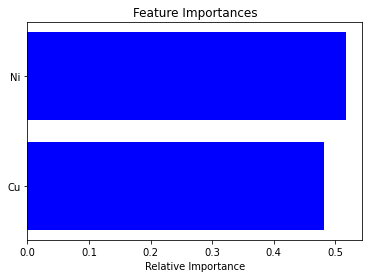

In [68]:
#plotando #feature importances"
features = x_variables
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
#plt.savefig('feature_importance_chem_lito.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()